# CPSC222 Final Project - Analyzing Spotify Data

CPSC 223 Section 01

12/13/2022

Sam Hopper, Manny Uzoma

Within this project, we are going to be analyzing the diferences in our spotify datasets. Moreover, we are going to attempt to train a machine learning model to predict the differences in our listening history.

## Introduction
1. The domain we are researching is a Spotify dataset.
1. We colleced CSV files of the data from Spotify.
1. Tables
    * Data was automatically collected using the Spotify Developer portal.
    * Each table has 4 instances, a date, artist name, track name, and miliseconds played.
1. Attributes:
    * Date: cardinal date and time in string
    * Artist name: the name of the artist in string format
    * Track Name: name of the track as a string
    * msPlayed: amount of time played (in miliseconds) as a integer
1. We are classifying the artist name and the miliseconds played in the dataset.
1. The primary potential impact on our results is us, being the stakeholders, as we will be demonstrating the resources learned from class in real world applications.

## Data Analysis
1. Cleaning
2. Merging tables


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

df = pd.read_csv("project_midterm_part.csv")
artist_name_df = df.groupby("artistName")

manny_df = pd.read_csv("StreamingHistory1.csv")
manny_artist_name = manny_df.groupby("artistName")

## Data Analysis

<BarContainer object of 5 artists>

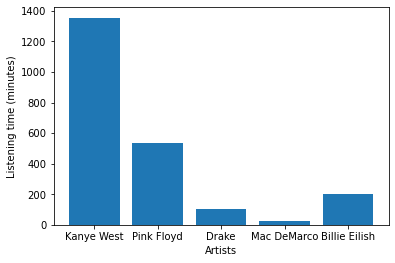

In [4]:
artist_df = artist_name_df.get_group("Kanye West")
artist_ser = artist_df["msPlayed"]

artist_df = artist_name_df.get_group("Pink Floyd")
artist_ser2 = artist_df["msPlayed"]

artist_df = artist_name_df.get_group("Drake")
artist_ser3 = artist_df["msPlayed"]

artist_df = artist_name_df.get_group("Mac DeMarco")
artist_ser4 = artist_df["msPlayed"]

artist_df = artist_name_df.get_group("Billie Eilish")
artist_ser5 = artist_df["msPlayed"]

x = ["Kanye West", "Pink Floyd", "Drake", "Mac DeMarco", "Billie Eilish"]
y = [int(artist_ser.sum()), int(artist_ser2.sum()), int(artist_ser3.sum()), int(artist_ser4.sum()), int(artist_ser5.sum())]


# finding the mean amount of time listened
mean_listening_time_ser = df.iloc[:,3]
test_statistic = mean_listening_time_ser.mean() / 60000

#print(y[0])
for i in range(len(y)):
    #print(i)
    y[i] = y[i] / 60000

"""
for i in y:
    print(i)
"""

plt.ylabel("Listening time (minutes)")
plt.xlabel("Artists")
plt.bar(x,y)

### One Sample, One-tailed test

In [6]:
t_computed, p_val = stats.ttest_1samp(y, test_statistic)

p_val /= 2 # because one tailed
print(t_computed, p_val)
alpha = 0.05
if p_val < alpha:
    print("reject H0")
else:
    print("DO NOT reject H0")

1.816021123460566 0.07176957834026423
DO NOT reject H0


## Classification Results

kNN and decision tree classifier

### Conclusion